# Procesamiento de estados de polarización 

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil, sqrt

#Escoge puntos al azar dentro del circulo
def puntos_en_circulo(n):
    r = 400 * np.sqrt(np.random.rand(n))
    θ = 2 * np.pi * np.random.rand(n)
    x = 450 + r * np.cos(θ)
    y = 450 + r * np.sin(θ)
    return np.column_stack((x, y)).astype(int)



def graficar_elipses(rgb, angulos, pixeles): 
    puntos = puntos_en_circulo(pixeles)
    c = ('r', 'b', 'g')

    filas = ceil(sqrt(pixeles))
    cols = ceil(pixeles / filas)

    fig, axs = plt.subplots(filas, cols, subplot_kw={'projection': 'polar'}, figsize=(4*cols, 4*filas))
    axs = np.array(axs).reshape(-1)  # Asegura que sea plano e indexable

    for ax, p in zip(axs, puntos):
        for i in range(3):
            ax.plot(angulos, rgb[:, p[0], p[1], i], color=c[i])
        ax.set_title(f"({p[0]},{p[1]})", fontsize=9)

    # Desactiva los ejes vacíos si hay más subplots que pixeles
    for ax in axs[pixeles:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()




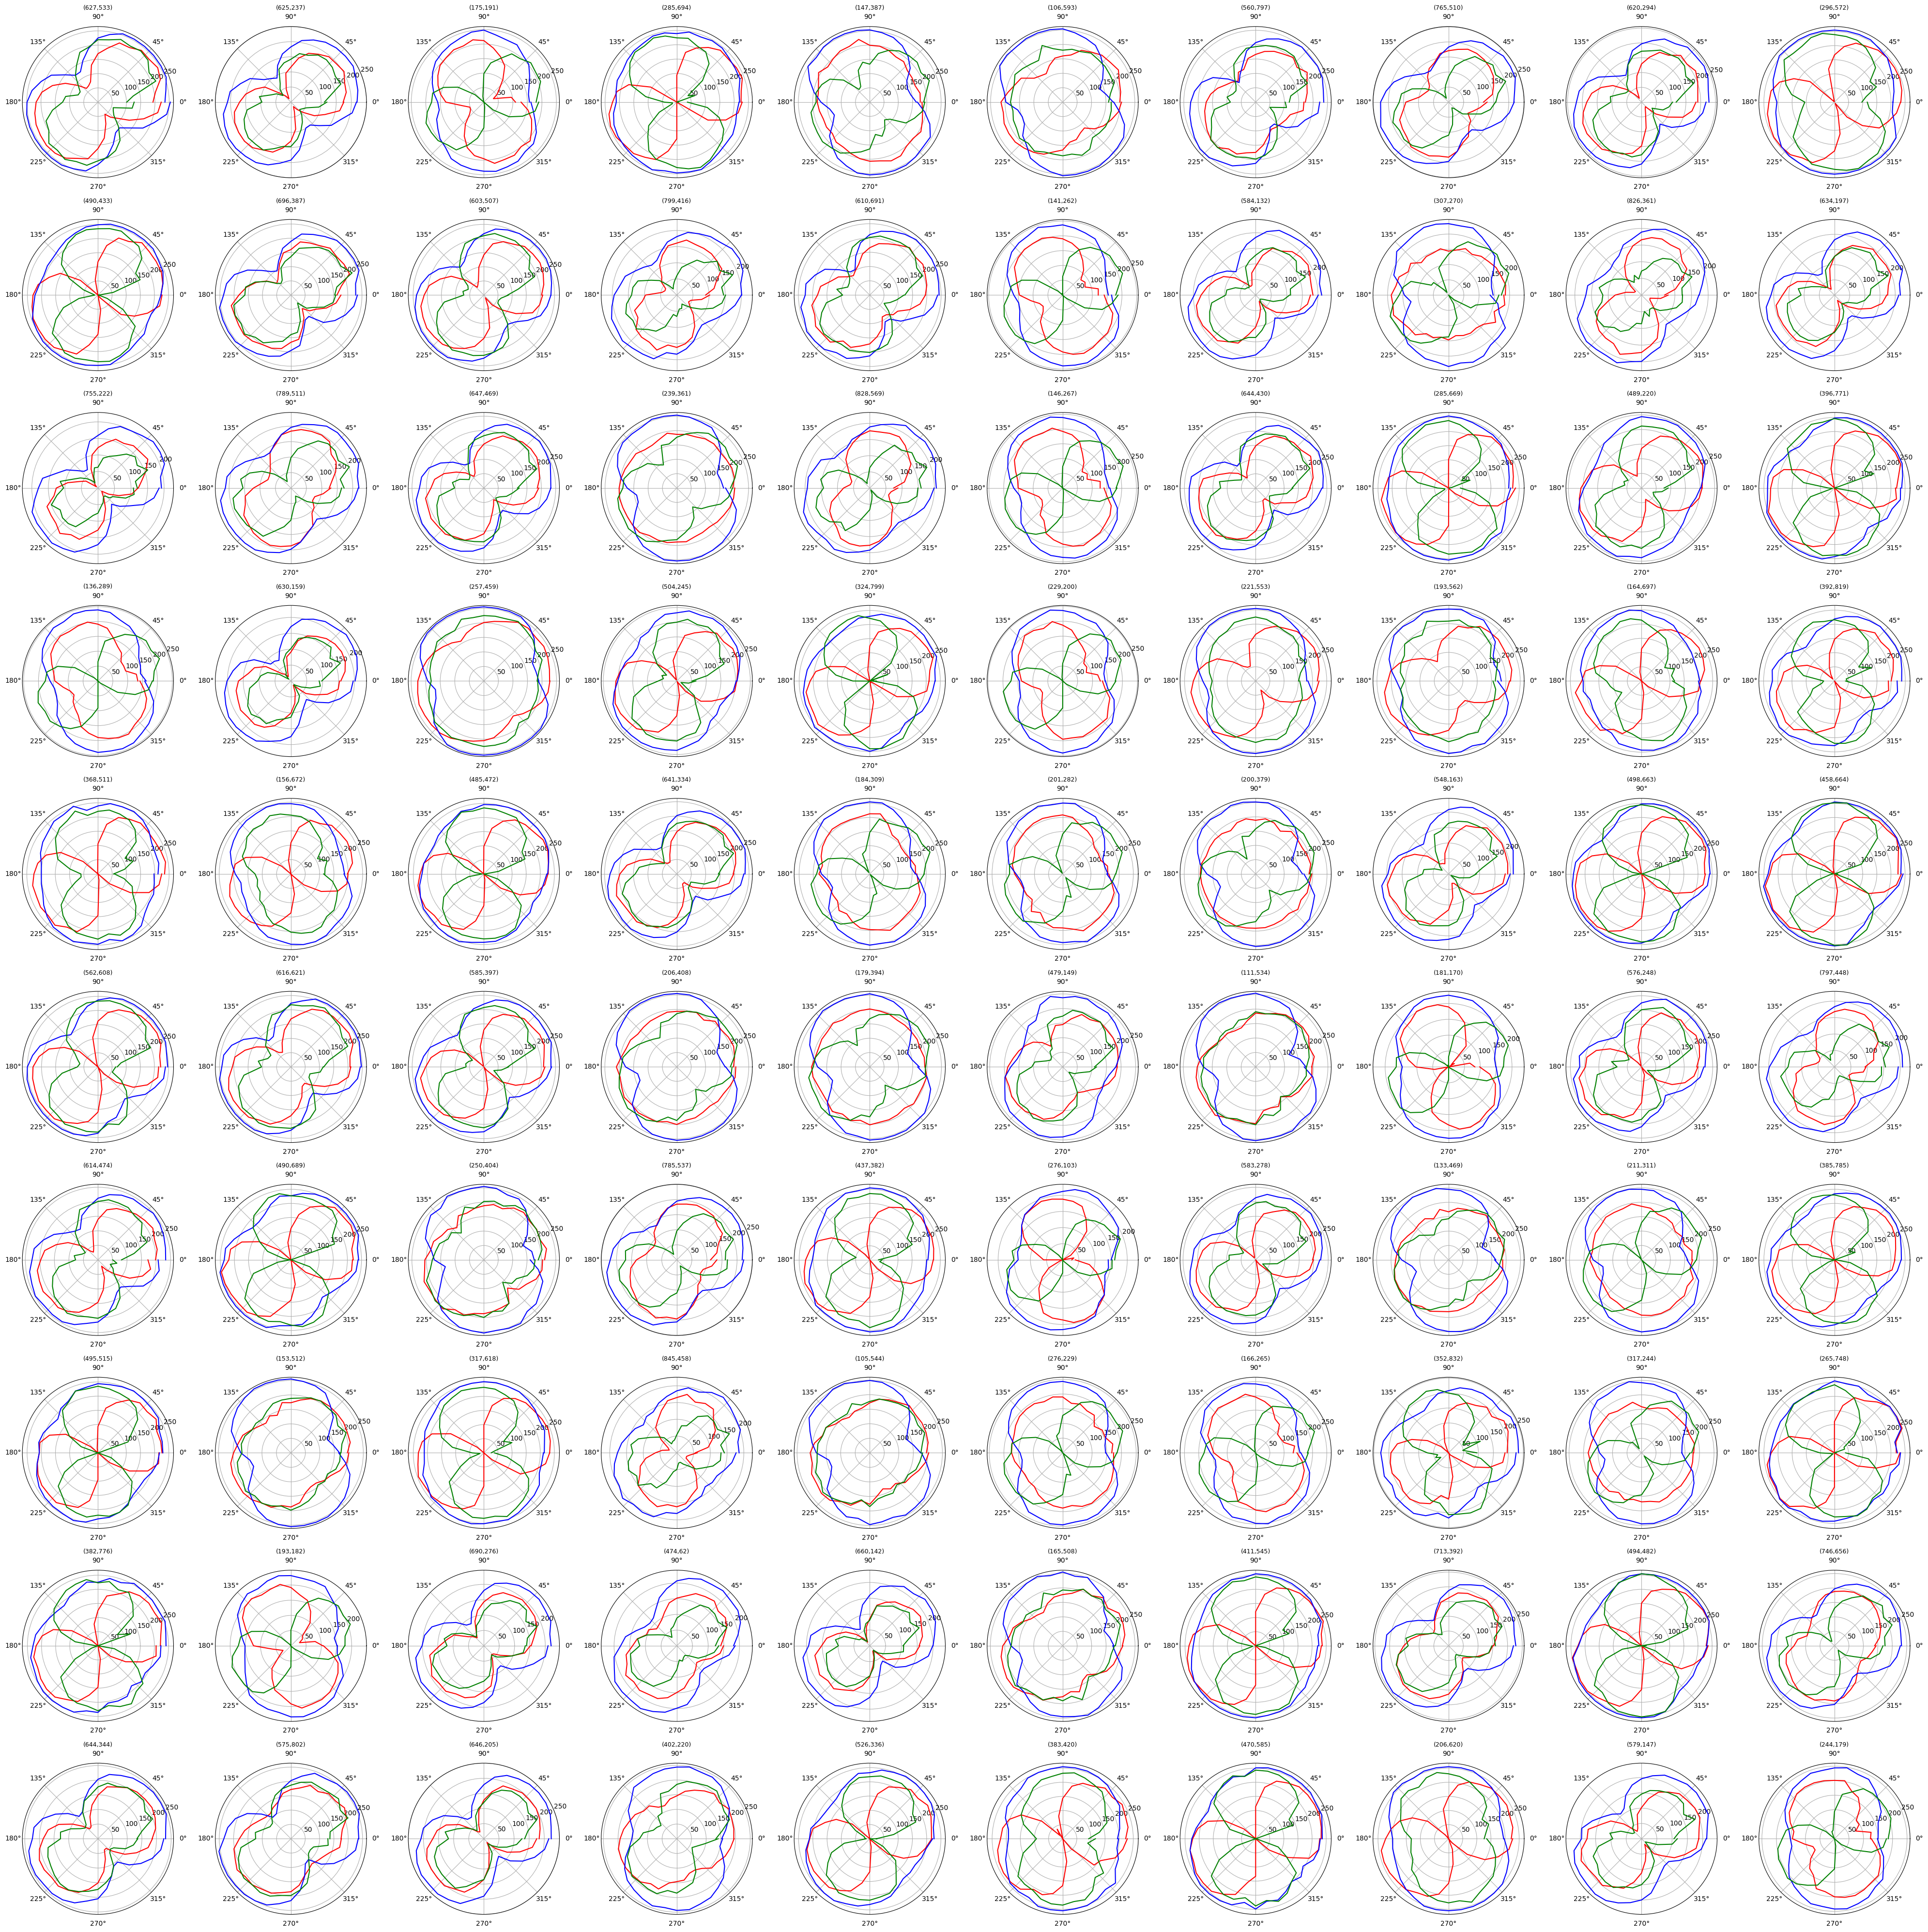

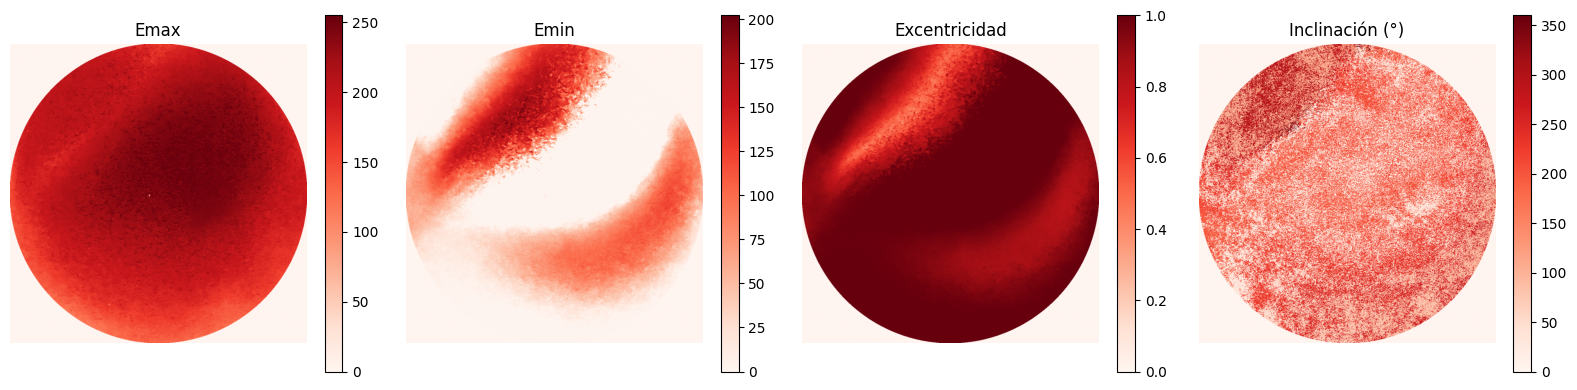

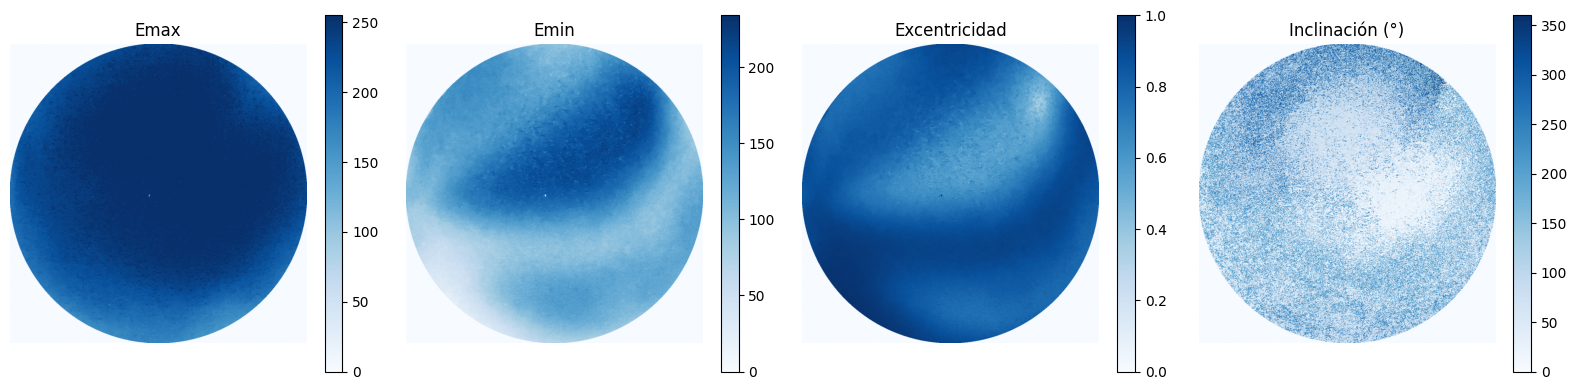

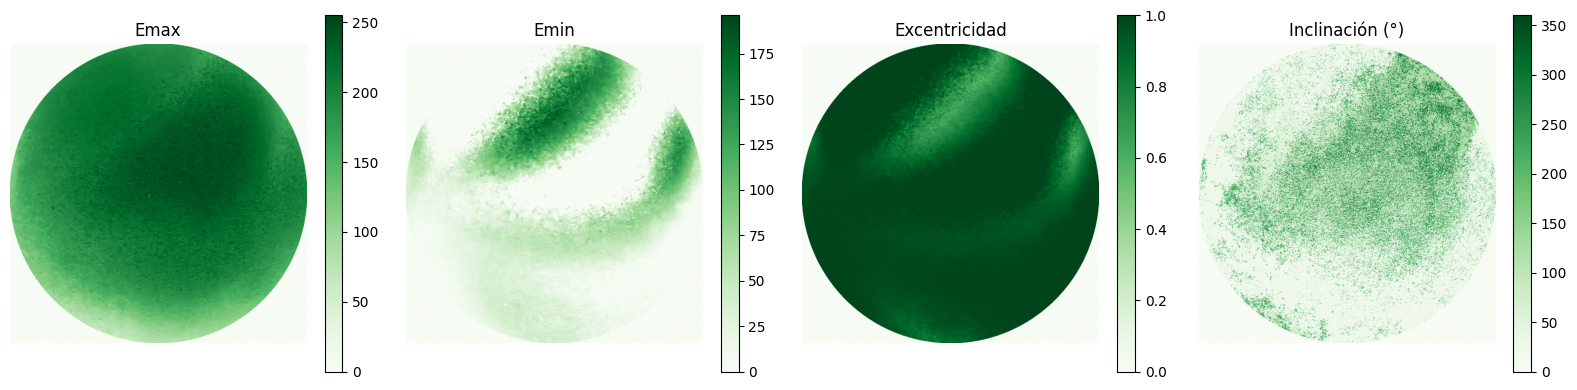

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread



rgb=[]
angulos = np.linspace(0, 2*np.pi, 37)

# Se cargan las imagenes en una lista y luego se convierte en stack.
for i in range(37):
    rgb.append(imread(f"images/{i}.png")[:,:,:])
rgb = np.stack(rgb)
size=rgb[1,:,:,0].shape

# Graficos polares 9 pixeles al hazar 
graficar_elipses(rgb,angulos,100)

# Se crean las arrays para las variables 
Emax=np.zeros(size)
Emin=np.zeros(size)
ψ=np.zeros(size)
cmaps=('Reds','Blues','Greens')

# Se hace para rgb (0,1,2)
for colores in (0,1,2):
    #Se recorre el mismo pixel en cada imagen y se encuentra el campo maximo, el minimo y el angulo correspondiente al maximo
    for m in range(size[0]):   # imagen (M,N) 
        for n in range(size[1]): # imagen (M,N)
            #plt.subplot(projection='polar')
            #plt.plot(angulos, rgb[:,m, n], color='r')
            Emax[m,n]=max(rgb[:,m, n,colores])
            Emin[m,n]=min(rgb[:,m, n,colores])
            indice_max = np.argmax(rgb[:, m, n,colores])
            ψ[m,n]=angulos[indice_max]
        #plt.show()
    
    #GRAFICAS

    fig, axs = plt.subplots(1, 4, figsize=(16, 4))

    # Emax
    im0 = axs[0].imshow(Emax, cmap=cmaps[colores])
    fig.colorbar(im0, ax=axs[0])
    axs[0].axis('off')
    axs[0].set_title("Emax")

    # Emin
    im1 = axs[1].imshow(Emin, cmap=cmaps[colores])
    fig.colorbar(im1, ax=axs[1])
    axs[1].axis('off')
    axs[1].set_title("Emin")

    # Excentricidad
    e = np.zeros_like(Emax)
    mask = Emax > 1e-3
    e[mask] = np.sqrt(1 - (Emin[mask] / Emax[mask])**2)

    im2 = axs[2].imshow(e, cmap=cmaps[colores], vmin=0, vmax=1)
    fig.colorbar(im2, ax=axs[2])
    axs[2].axis('off')
    axs[2].set_title("Excentricidad")

    # Inclinación (ψ en grados)
    im3 = axs[3].imshow(ψ * 180 / np.pi, cmap=cmaps[colores], vmin=0, vmax=360)
    fig.colorbar(im3, ax=axs[3])
    axs[3].axis('off')
    axs[3].set_title("Inclinación (°)")

    plt.tight_layout()
    plt.show()





    
    





<!--  -->